In [ ]:
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
 
docs=[]
docs_names=[]

path="/content/drive/MyDrive/FYP/Text_Files"
dir_list = os.listdir(path)
print(dir_list)

for f in dir_list:
  with open(path+"/"+f, "r", encoding='Windows-1252') as file:
    data = file.read()
  data = data.replace("\n"," ")
  docs.append(data)
  docs_names.append(f)
  #print(f)

['A00-1000.pdf.txt', 'A00-1001.pdf.txt', 'A00-1002.pdf.txt', 'A00-1003.pdf.txt', 'A00-1004.pdf.txt', 'A00-1006.pdf.txt', 'A00-1005.pdf.txt', 'A00-1007.pdf.txt', 'A00-1008.pdf.txt', 'A00-1009.pdf.txt', 'A83-1018.pdf.txt', 'A83-1017.pdf.txt', 'A83-1019.pdf.txt', 'A83-1016.pdf.txt', 'A83-1020.pdf.txt', 'A83-1021.pdf.txt', 'A83-1033.pdf.txt', 'A88-1000.pdf.txt', 'A83-1032.pdf.txt', 'A88-1003.pdf.txt', 'A88-1002.pdf.txt', 'A88-1001.pdf.txt', 'A88-1004.pdf.txt', 'A88-1005.pdf.txt', 'A88-1006.pdf.txt', 'A88-1023.pdf.txt', 'A88-1025.pdf.txt', 'A88-1024.pdf.txt', 'A88-1021.pdf.txt', 'A88-1022.pdf.txt', 'A88-1026.pdf.txt', 'A88-1028.pdf.txt', 'A88-1027.pdf.txt', 'A92-1005.pdf.txt', 'A92-1004.pdf.txt', 'A92-1030.pdf.txt', 'A92-1031.pdf.txt', 'A92-1034.pdf.txt', 'A92-1036.pdf.txt', 'A92-1033.pdf.txt', 'A92-1032.pdf.txt', 'A92-1035.pdf.txt', 'A92-1043.pdf.txt', 'A94-1000.pdf.txt', 'A92-1038.pdf.txt', 'A92-1037.pdf.txt', 'A92-1044.pdf.txt', 'A92-1040.pdf.txt', 'A92-1041.pdf.txt', 'A92-1047.pdf.txt',

In [ ]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(docs)

print(X.shape)

(500, 62880)


In [ ]:
def preprocess(data):
  for i in range(len(data)):
    str = data[i]

    re.compile('<title>(.*)</title>')
    text = re.sub(r'[^\w ]+', "",str)
    
    text = re.sub(r"\b[0-9]+\b\s*", " ", text)

    #remove words containing numbers
    text=re.sub(r"[A-Za-z]+\d+|\d+[A-Za-z]+",'',text).strip()

    word_tokens = word_tokenize(text)
    
    stop_words = stopwords.words('english')
    stw = [w for w in word_tokens if not w in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_text = ""
    for word in stw:
        word = lemmatizer.lemmatize(word)

    ps = PorterStemmer()
    stemmed_text = ""
    for word in stw:
        stemmed_text = stemmed_text + " " + ps.stem(word).lower()
        
    docs[i] = stemmed_text
    
preprocess(docs)

In [ ]:
from scipy.sparse import csr_matrix

S = csr_matrix(X)

# reconstruct dense matrix
Z = S.todense()

In [ ]:
Z[99].shape

(1, 62880)

In [ ]:
import keras
from keras.layers import Dense,Conv1D,UpSampling1D,MaxPooling1D
from keras.models import sequential
from keras import *
input = Input(shape=(62880,1))
encoded1 = Conv1D(filters=32, kernel_size=3,padding="same", activation='relu')(input)
max1 = MaxPooling1D(pool_size=2)(encoded1)
encoded2 = Conv1D(filters=64, kernel_size=3,padding="same", activation='relu')(max1)
max2 = MaxPooling1D(pool_size=2)(encoded2)
encoded3 = Conv1D(filters=128, kernel_size=3,padding="same", activation='relu')(max2)
max3 = MaxPooling1D(pool_size=2)(encoded3)
encoded4 = Conv1D(filters=128, kernel_size=3,padding="same", activation='relu')(max3) 
up1 = UpSampling1D(2)(encoded4)
decoded1 = Conv1D(filters=128, kernel_size=3,padding="same", activation='relu')(up1) 
up2 = UpSampling1D(2)(decoded1)
decoded2 = Conv1D(filters=64, kernel_size=3,padding="same", activation='relu')(up2)
up3 = UpSampling1D(2)(decoded2)
decoded3 = Conv1D(filters=32, kernel_size=1,padding="same", activation='relu')(up3)
decoded4 = Conv1D(filters=1, kernel_size=1,padding="same", activation='relu')(up3)
autoencoder=Model(input,decoded4)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 62880, 1)]        0         
                                                                 
 conv1d (Conv1D)             (None, 62880, 32)         128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31440, 32)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 31440, 64)         6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15720, 64)        0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 15720, 128)        24704 

In [ ]:
autoencoder.compile(optimizer='adam',loss='MSE',metrics=['accuracy'])
autoencoder.fit(Z, Z, epochs=5, batch_size=5, shuffle=True, verbose=True)

Epoch 1/5
100/100 [==============================] - 1071s 4s/step - loss: 1.7373e-05 - accuracy: 0.9768
Epoch 2/5
100/100 [==============================] - 376s 4s/step - loss: 1.5903e-05 - accuracy: 0.9768
Epoch 3/5
100/100 [==============================] - 375s 4s/step - loss: 1.5903e-05 - accuracy: 0.9768
Epoch 4/5
100/100 [==============================] - 376s 4s/step - loss: 1.5903e-05 - accuracy: 0.9768
Epoch 5/5
100/100 [==============================] - 407s 4s/step - loss: 1.5903e-05 - accuracy: 0.9768


In [ ]:
from tensorflow.keras.models import load_model

autoencoder.save('/content/drive/MyDrive/FYP/saved_model/autoencoder.h5')

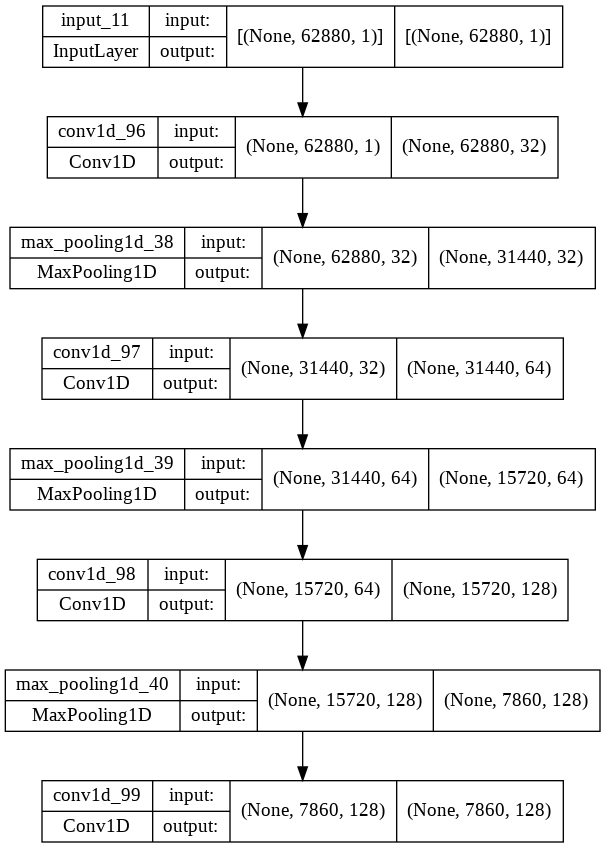

In [ ]:
from tensorflow.keras.utils import plot_model
# define an encoder model (without the decoder)
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.encoded4)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('/content/drive/MyDrive/FYP/saved_model/encoder.h5')

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/FYP/dataset.csv')

In [ ]:
compress = []
for i in range(len(Z)) :
  a = (encoder.predict(Z[i]).flatten())
  compress.append(a)

In [ ]:
doc1 = []

for i in range(len(df)) :
  a = docs_names.index(df.iloc[i,0])
  doc1.append(compress[a])

df['doc1'] = doc1

In [ ]:
doc2 = []

for i in range(len(df)) :
  a = docs_names.index(df.iloc[i,1])
  doc2.append(compress[a])

df['doc2'] = doc2

In [ ]:
df.head()